## Experiment with I219

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
RECORDS = 1e5

In [3]:
def load(path, is_client):
    with open(path, "r") as f:
        data =f.read().split('\n')
    data_formatted = []
    temp = []
#     for i, row in enumerate(data):
#         if i % 5 == 0:
#             temp = []
#             temp.append(int(re.findall('[0-9]+', row)[0]))
#         elif i % 5 == 4:
#             temp.append(np.float64(row.split()[-1][6:]))
#             data_formatted.append(temp)
#         else:
#             temp.append(np.float64(row.split()[-1][6:]))
    for row in data:
        if 'Iter' in row:
            data_formatted.append(temp)
            temp = []
            temp.append(int(re.findall('[0-9]+', row)[0]))
        else:
            try:
                temp.append(np.float64(row.split()[-1][6:]))
            except:
                print(row)
        
    data_formatted = data_formatted[:-1]
    if is_client:
        data_formatted[0] = "Iter","SW-SEND-C","HW-SEND-C","SW-RECV-C","HW-RECV-C"
        data_formatted = pd.DataFrame(data_formatted[1:], columns=data_formatted[0])
    else:
        data_formatted[0] = "Iter","SW-RECV-S","HW-RECV-S","SW-SEND-S","HW-SEND-S"
        data_formatted = pd.DataFrame(data_formatted[1:], columns=data_formatted[0])
    return data_formatted

In [4]:
datac = load("client_02.log", True).loc[:RECORDS]
datas = load("server_02.log", False).loc[:RECORDS]
data = pd.merge(left=datac, right=datas, on='Iter')

In [5]:
data["GO-DELAY-HARD"] = data['HW-RECV-S'] - data['HW-SEND-C']
data["GO-DELAY-SOFT"] = data['SW-RECV-S'] - data['SW-SEND-C']
data["BACK-DELAY-HARD"] = data['HW-RECV-C'] - data['HW-SEND-S']
data["BACK-DELAY-SOFT"] = data['SW-RECV-C'] - data['SW-SEND-S']
data["RTT-SOFT"] = (data['SW-RECV-C'] - data['SW-SEND-C']) - (data['SW-SEND-S'] - data['SW-RECV-S'])
data["RTT-HARD"] = (data['HW-RECV-C'] - data['HW-SEND-C']) - (data['HW-SEND-S'] - data['HW-RECV-S'])

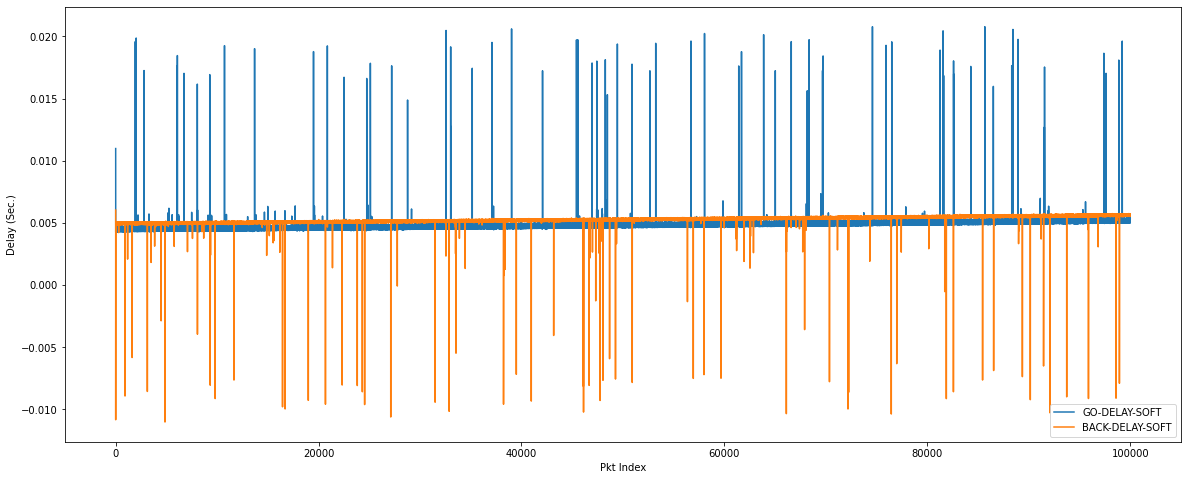

In [6]:
plt.figure(figsize=(20,8))
sns.lineplot(x=data['Iter'], y=-1 * data['GO-DELAY-SOFT'], label='GO-DELAY-SOFT')
sns.lineplot(x=data['Iter'], y=data['BACK-DELAY-SOFT'], label='BACK-DELAY-SOFT')
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("01.png")

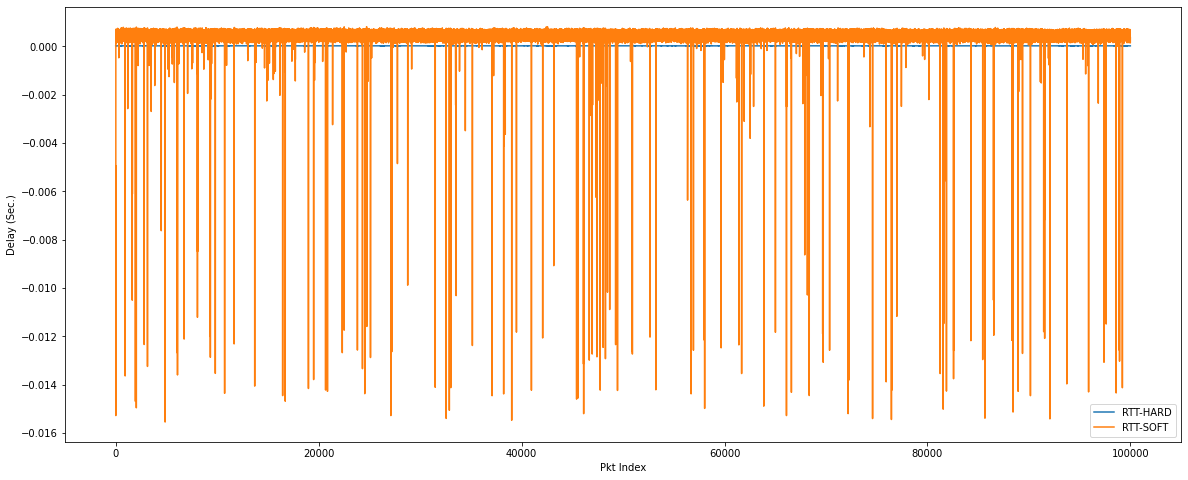

In [7]:
plt.figure(figsize=(20,8))
for i in ['RTT-HARD', 'RTT-SOFT']:
    sns.lineplot(x=data['Iter'], y=data[i], label=i)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("03.png")

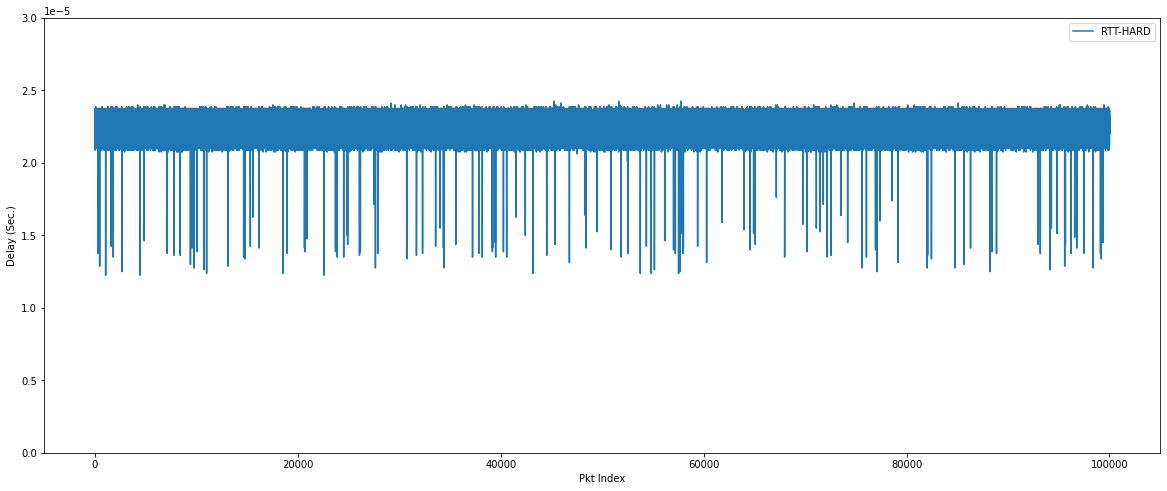

In [8]:
plt.figure(figsize=(20,8))
a = sns.lineplot(x=data['Iter'], y=data['RTT-HARD'], label='RTT-HARD')
plt.ylim(0, 0.00003)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("04.png")

In [9]:
data[['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']].describe()

,GO-DELAY-SOFT,BACK-DELAY-SOFT,RTT-SOFT,GO-DELAY-HARD,BACK-DELAY-HARD,RTT-HARD
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05
mean,-0.004849,0.005273,0.000425,0.058125,-0.058102,2.267546e-05
std,0.000420,0.000391,0.000501,0.000089,0.000089,8.636694e-07
min,-0.020785,-0.011013,-0.015545,0.057960,-0.058261,1.225000e-05
25%,-0.005014,0.005110,0.000339,0.058049,-0.058179,2.225000e-05
50%,-0.004834,0.005275,0.000427,0.058126,-0.058104,2.250000e-05
75%,-0.004666,0.005453,0.000558,0.058202,-0.058026,2.350000e-05
max,-0.004268,0.006038,0.000815,0.058277,-0.057945,2.425000e-05


In [10]:
data_sns = pd.melt(data[['Iter','GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT', 'RTT-HARD']], id_vars=['Iter'])

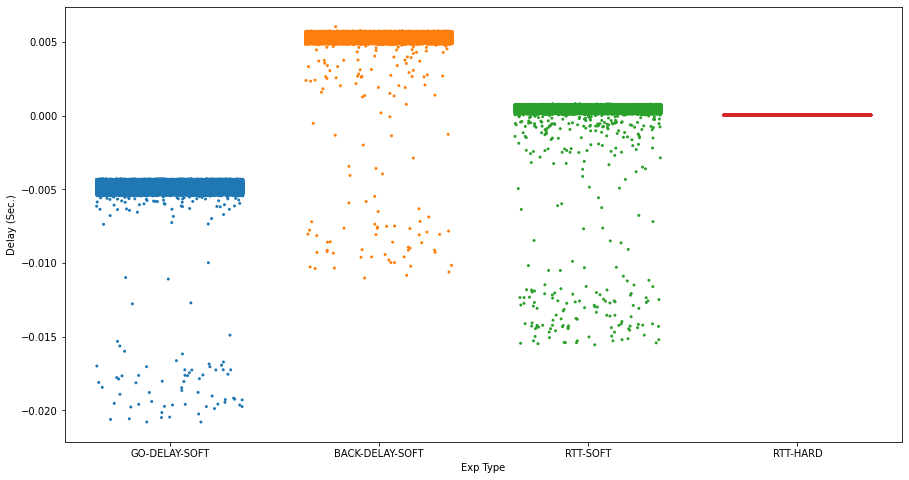

In [11]:
plt.figure(figsize=(15,8))
sns.stripplot(data = data_sns, y='value', x = 'variable',jitter=0.35,size=3)

plt.xlabel("Exp Type")
plt.ylabel("Delay (Sec.)")
plt.savefig("05.png")

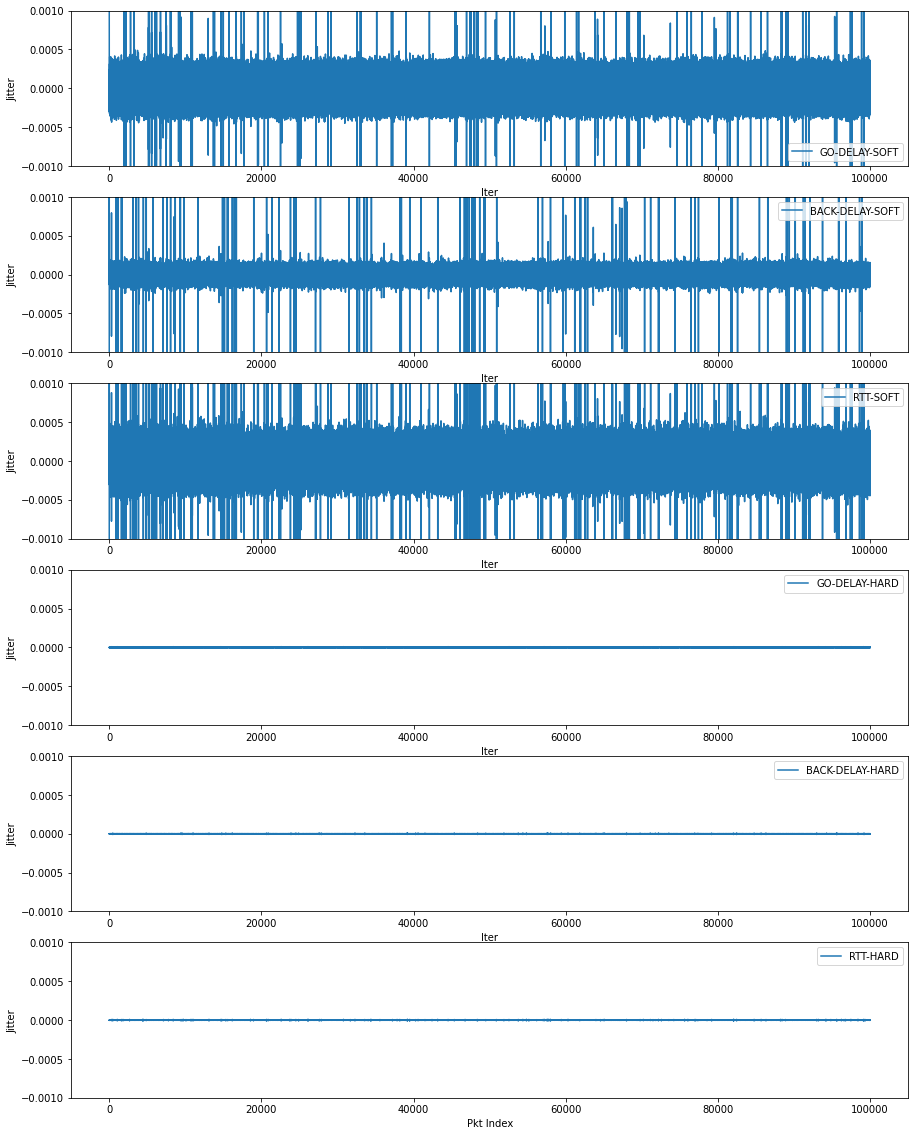

In [12]:
fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data['Iter'], y=data[i].diff(), label=i,ax=axes[n])
    a.set(ylim=(-0.001, 0.001))
    a.set_ylabel('Jitter')
    plt.xlabel("Pkt Index")
plt.savefig("06.png")

## Experiment with I210

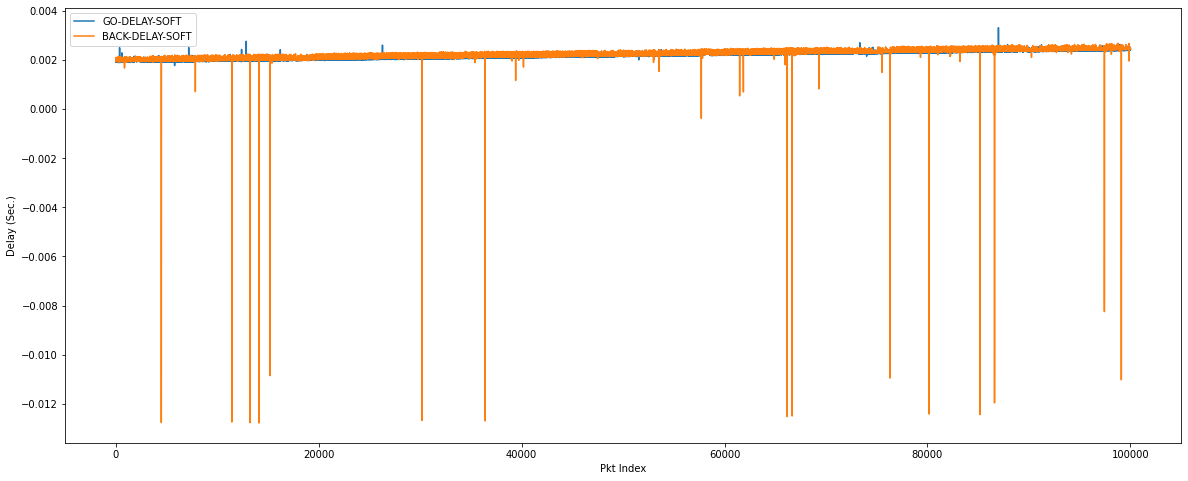

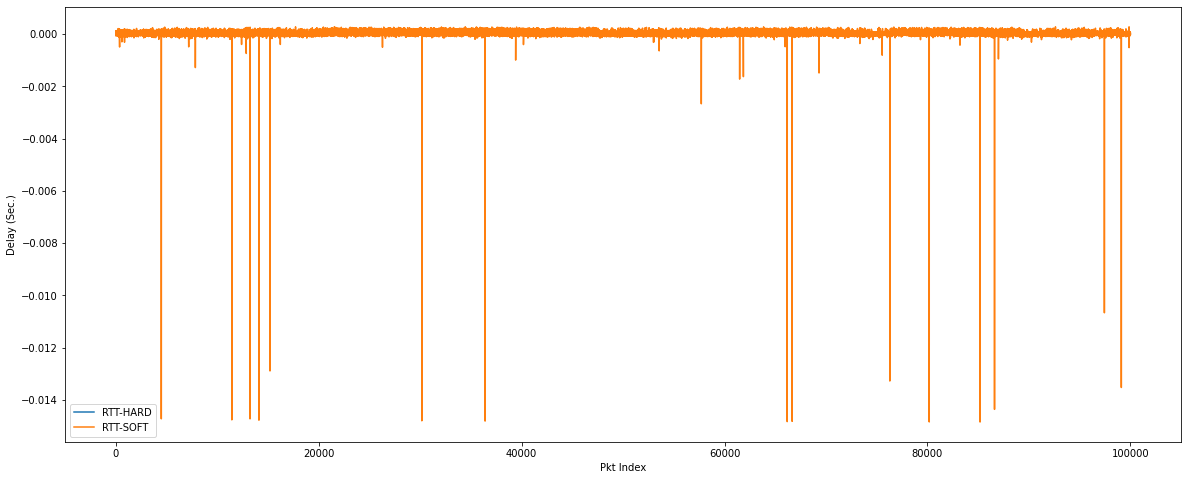

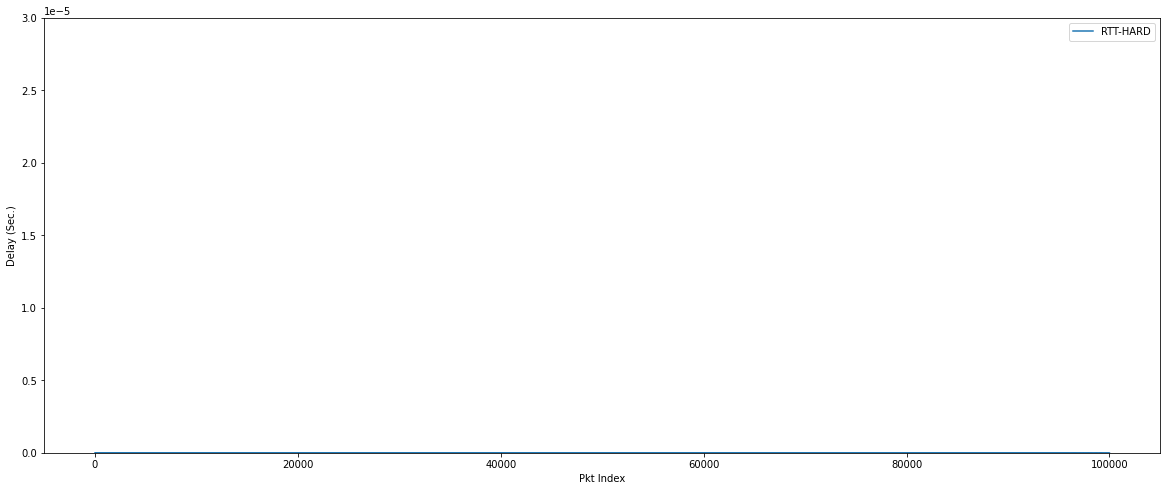

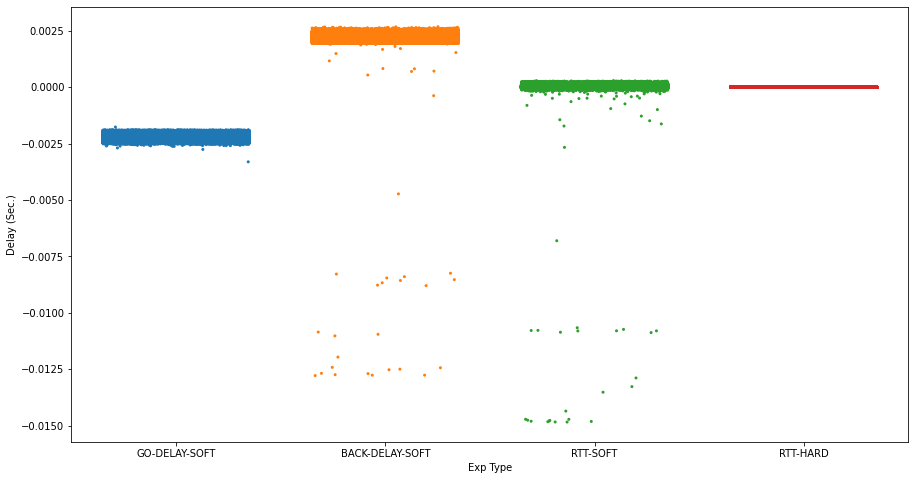

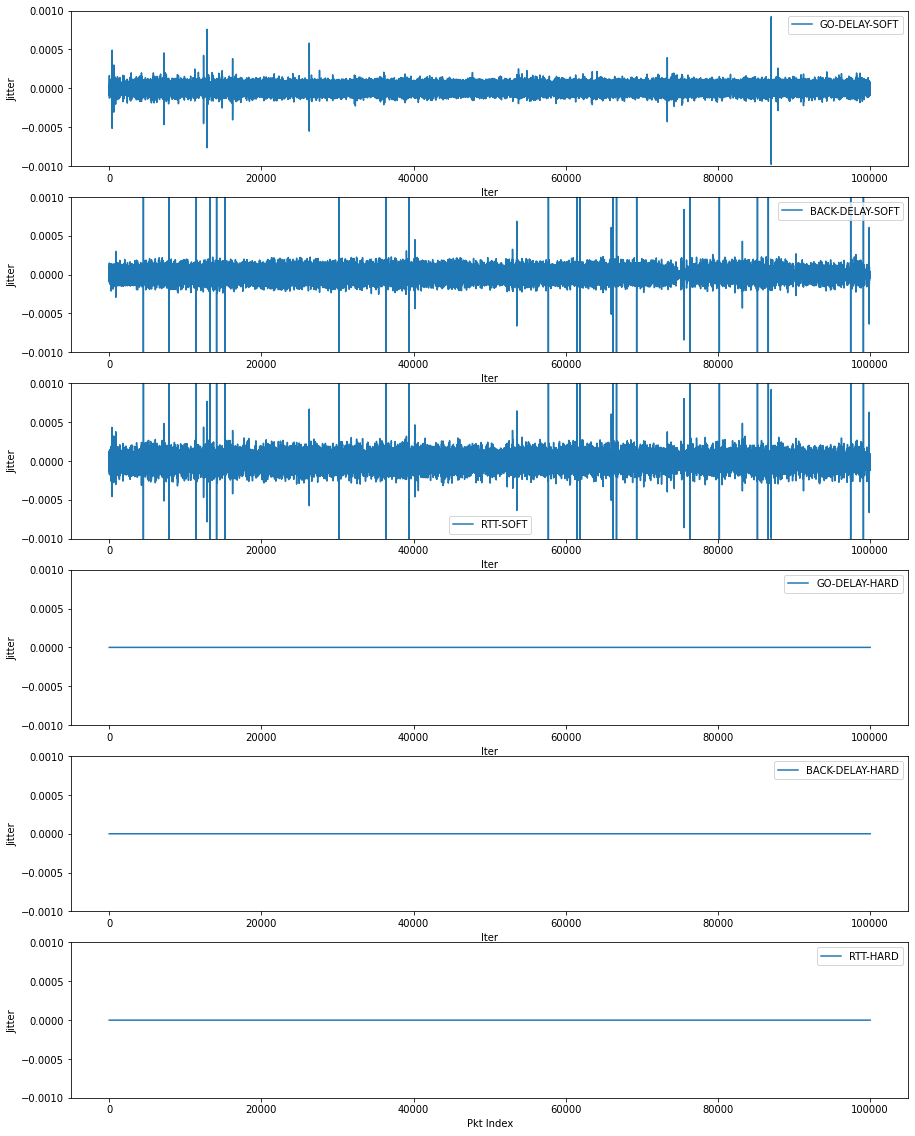

In [13]:
data_i210c = load("client.log", True).loc[:RECORDS]
data_i210s = load("server.log", False).loc[:RECORDS]
data_i210 = pd.merge(left=data_i210c, right=data_i210s, on='Iter')

data_i210["GO-DELAY-HARD"] = data_i210['HW-RECV-S'] - data_i210['HW-SEND-C']
data_i210["GO-DELAY-SOFT"] = data_i210['SW-RECV-S'] - data_i210['SW-SEND-C']
data_i210["BACK-DELAY-HARD"] = data_i210['HW-RECV-C'] - data_i210['HW-SEND-S']
data_i210["BACK-DELAY-SOFT"] = data_i210['SW-RECV-C'] - data_i210['SW-SEND-S']
data_i210["RTT-SOFT"] = (data_i210['SW-RECV-C'] - data_i210['SW-SEND-C']) - (data_i210['SW-SEND-S'] - data_i210['SW-RECV-S'])
data_i210["RTT-HARD"] = (data_i210['HW-RECV-C'] - data_i210['HW-SEND-C']) - (data_i210['HW-SEND-S'] - data_i210['HW-RECV-S'])

plt.figure(figsize=(20,8))
sns.lineplot(x=data_i210['Iter'], y=-1 * data_i210['GO-DELAY-SOFT'], label='GO-DELAY-SOFT')
sns.lineplot(x=data_i210['Iter'], y=data_i210['BACK-DELAY-SOFT'], label='BACK-DELAY-SOFT')
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("01_i210.png")

plt.figure(figsize=(20,8))
for i in ['RTT-HARD', 'RTT-SOFT']:
    sns.lineplot(x=data_i210['Iter'], y=data_i210[i], label=i)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("03_i210.png")

plt.figure(figsize=(20,8))
a = sns.lineplot(x=data_i210['Iter'], y=data_i210['RTT-HARD'], label='RTT-HARD')
plt.ylim(0, 0.00003)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("04_i210.png")

data_i210[['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']].describe()

data_i210_sns = pd.melt(data_i210[['Iter','GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT', 'RTT-HARD']], id_vars=['Iter'])

plt.figure(figsize=(15,8))
sns.stripplot(data = data_i210_sns, y='value', x = 'variable',jitter=0.35,size=3)

plt.xlabel("Exp Type")
plt.ylabel("Delay (Sec.)")
plt.savefig("05_i210.png")

fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data_i210['Iter'], y=data_i210[i].diff(), label=i,ax=axes[n])
    a.set(ylim=(-0.001, 0.001))
    a.set_ylabel('Jitter')
    plt.xlabel("Pkt Index")
plt.savefig("06_i210.png")

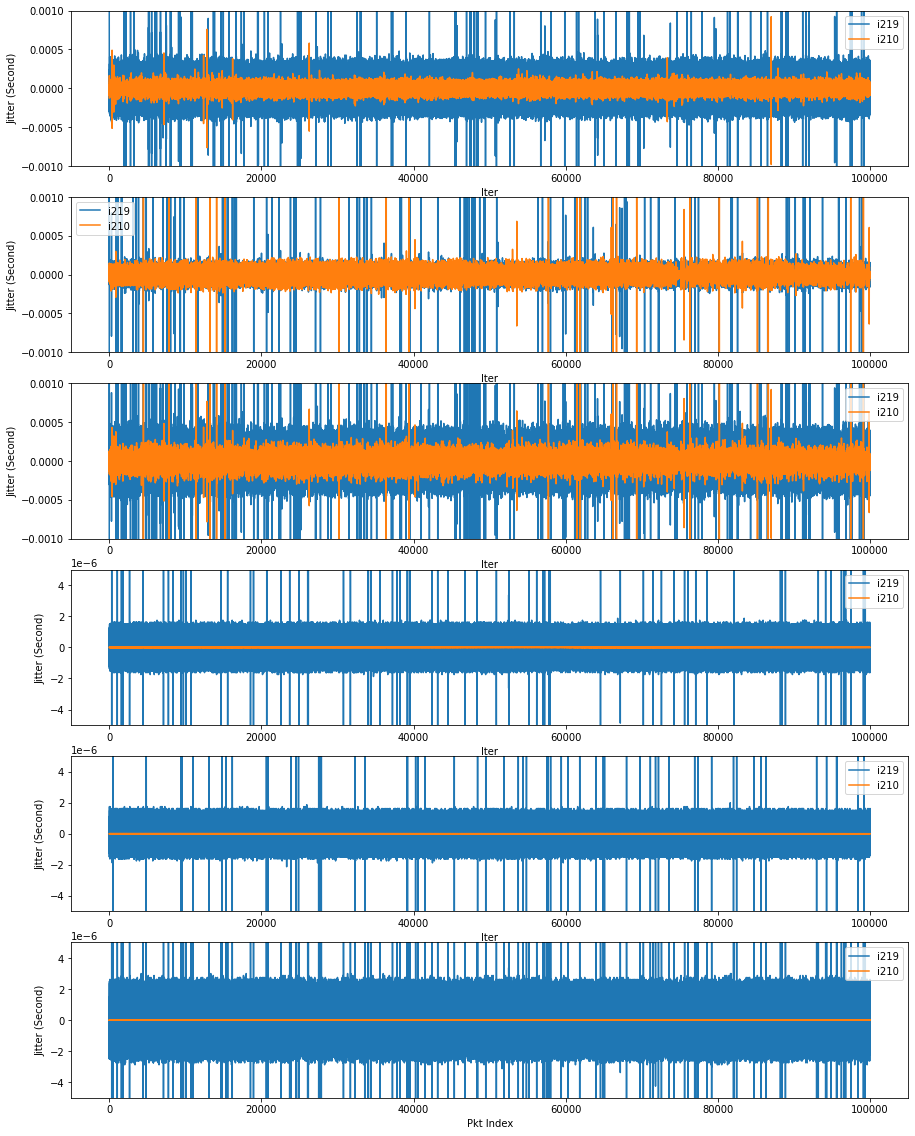

In [14]:
fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data['Iter'], y=data[i].diff(), label='i219',ax=axes[n])
    a = sns.lineplot(x=data_i210['Iter'], y=data_i210[i].diff(), label='i210',ax=axes[n])
    if i[-4:] == 'SOFT':
        a.set(ylim=(-0.001, 0.001))
    else:
        a.set(ylim=(-0.000005, 0.000005))
    a.set_ylabel('Jitter (Second)')
    plt.xlabel("Pkt Index")
plt.savefig("06_compare.png")

In [15]:
data[['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']].describe()

,GO-DELAY-SOFT,BACK-DELAY-SOFT,RTT-SOFT,GO-DELAY-HARD,BACK-DELAY-HARD,RTT-HARD
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05
mean,-0.004849,0.005273,0.000425,0.058125,-0.058102,2.267546e-05
std,0.000420,0.000391,0.000501,0.000089,0.000089,8.636694e-07
min,-0.020785,-0.011013,-0.015545,0.057960,-0.058261,1.225000e-05
25%,-0.005014,0.005110,0.000339,0.058049,-0.058179,2.225000e-05
50%,-0.004834,0.005275,0.000427,0.058126,-0.058104,2.250000e-05
75%,-0.004666,0.005453,0.000558,0.058202,-0.058026,2.350000e-05
max,-0.004268,0.006038,0.000815,0.058277,-0.057945,2.425000e-05


In [16]:
data_i210[['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']].describe()

,GO-DELAY-SOFT,BACK-DELAY-SOFT,RTT-SOFT,GO-DELAY-HARD,BACK-DELAY-HARD,RTT-HARD
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05
mean,-0.002200,0.002223,0.000023,8019.789865,-8019.789865,-9.534027e-09
std,0.000145,0.000249,0.000209,0.000018,0.000018,3.694173e-09
min,-0.003312,-0.012785,-0.014843,8019.789841,-8019.789902,-1.200192e-08
25%,-0.002320,0.002107,-0.000011,8019.789848,-8019.789880,-1.200033e-08
50%,-0.002199,0.002225,0.000024,8019.789861,-8019.789861,-1.199965e-08
75%,-0.002077,0.002349,0.000057,8019.789880,-8019.789848,-4.000640e-09
max,-0.001770,0.002677,0.000280,8019.789902,-8019.789841,-3.998139e-09


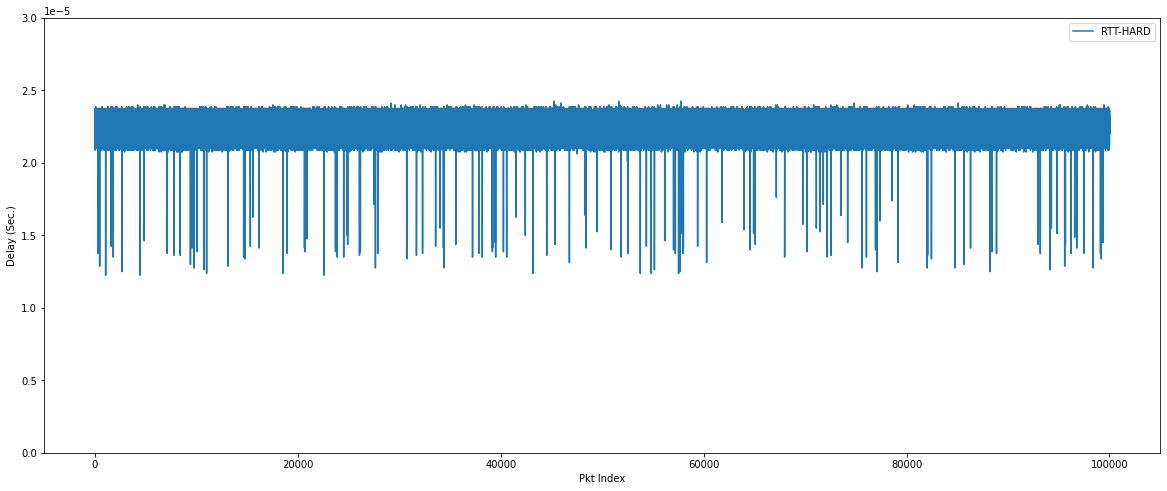

In [17]:
plt.figure(figsize=(20,8))
a = sns.lineplot(x=data['Iter'], y=data['RTT-HARD'], label='RTT-HARD')
plt.ylim(0, 0.00003)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("04.png")

## Experiment with I210 -- Cross 1 HOP

SW-SEND    TIMESTAM
SW-RECV    TIMESTAM


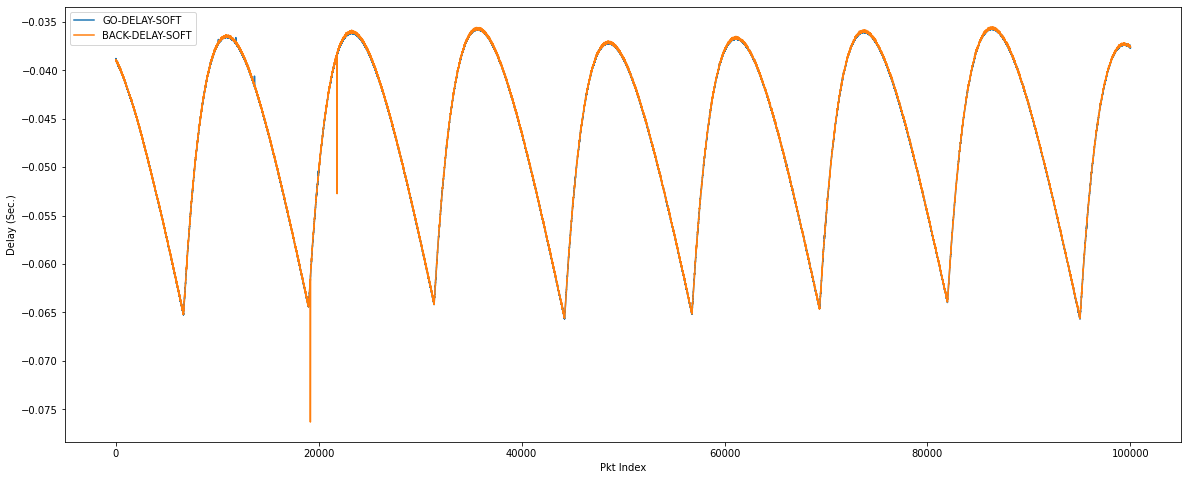

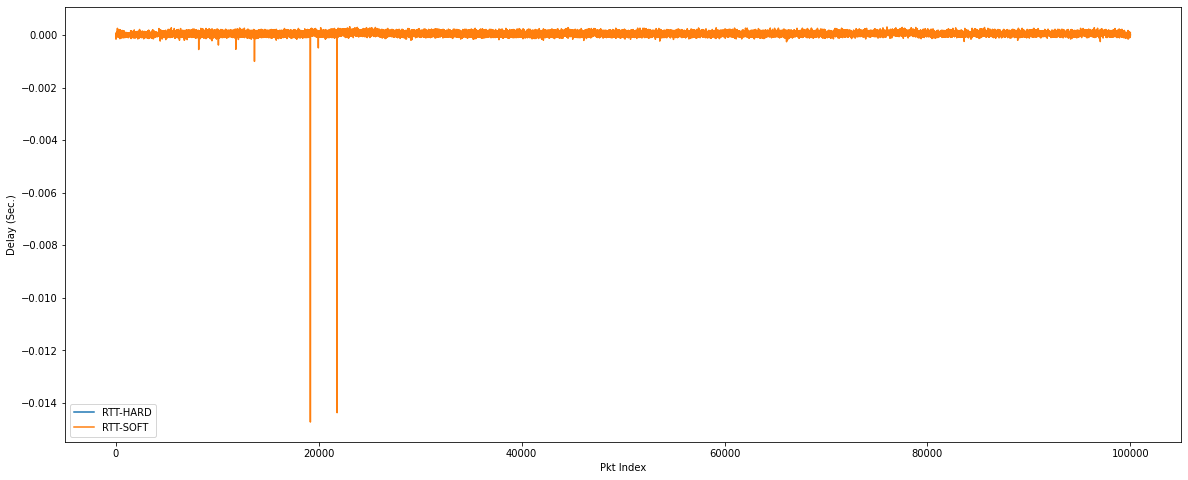

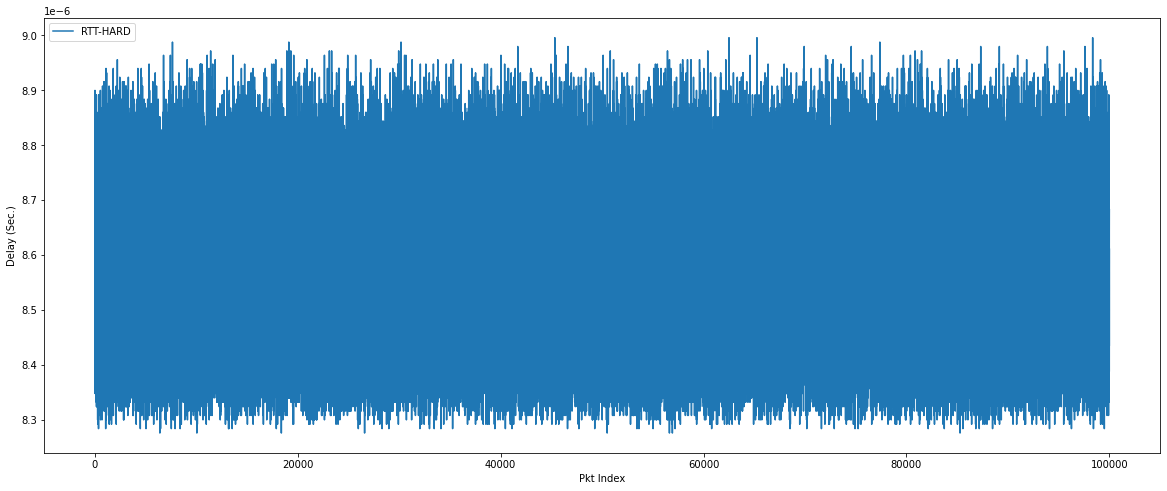

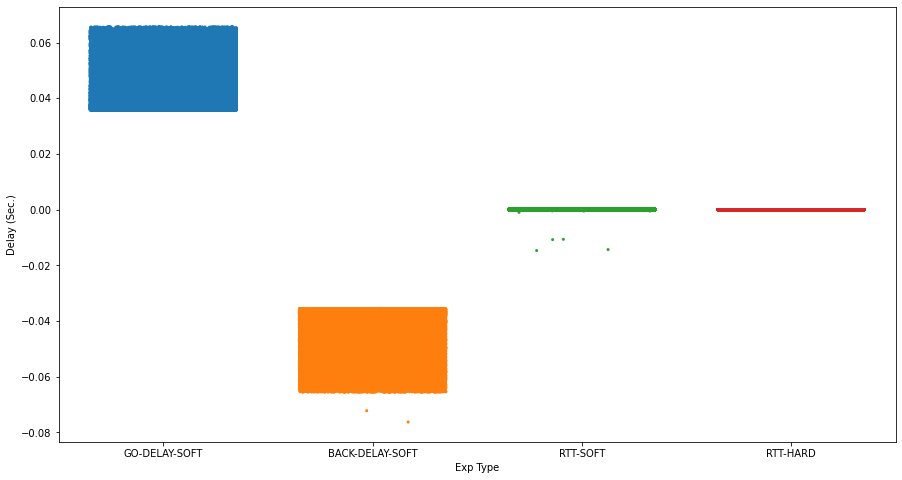

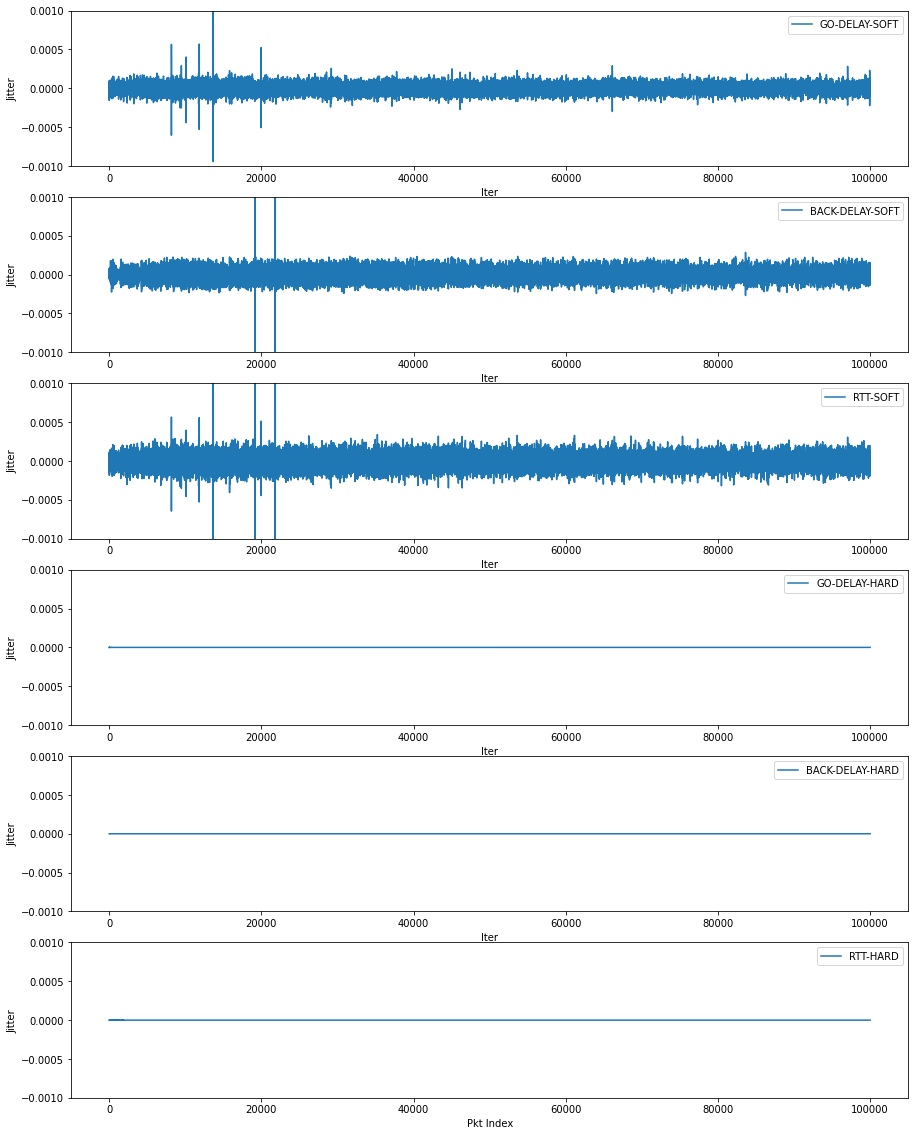

In [18]:
data_i210_1hopc = load("client_1hop.log", True).loc[:RECORDS]
data_i210_1hops = load("server_1hop.log", False).loc[:RECORDS]

data_i210_1hop = pd.merge(left=data_i210_1hopc, right=data_i210_1hops, on='Iter')

data_i210_1hop["GO-DELAY-HARD"] = data_i210_1hop['HW-RECV-S'] - data_i210_1hop['HW-SEND-C']
data_i210_1hop["GO-DELAY-SOFT"] = data_i210_1hop['SW-RECV-S'] - data_i210_1hop['SW-SEND-C']
data_i210_1hop["BACK-DELAY-HARD"] = data_i210_1hop['HW-RECV-C'] - data_i210_1hop['HW-SEND-S']
data_i210_1hop["BACK-DELAY-SOFT"] = data_i210_1hop['SW-RECV-C'] - data_i210_1hop['SW-SEND-S']
data_i210_1hop["RTT-SOFT"] = (data_i210_1hop['SW-RECV-C'] - data_i210_1hop['SW-SEND-C']) - (data_i210_1hop['SW-SEND-S'] - data_i210_1hop['SW-RECV-S'])
data_i210_1hop["RTT-HARD"] = (data_i210_1hop['HW-RECV-C'] - data_i210_1hop['HW-SEND-C']) - (data_i210_1hop['HW-SEND-S'] - data_i210_1hop['HW-RECV-S'])

plt.figure(figsize=(20,8))
sns.lineplot(x=data_i210_1hop['Iter'], y=-1 * data_i210_1hop['GO-DELAY-SOFT'], label='GO-DELAY-SOFT')
sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop['BACK-DELAY-SOFT'], label='BACK-DELAY-SOFT')
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("01_i210_1hop.png")

plt.figure(figsize=(20,8))
for i in ['RTT-HARD', 'RTT-SOFT']:
    sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop[i], label=i)
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("03_i210_1hop.png")

plt.figure(figsize=(20,8))
a = sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop['RTT-HARD'], label='RTT-HARD')
plt.xlabel("Pkt Index")
plt.ylabel("Delay (Sec.)")
plt.savefig("04_i210_1hop.png")

data_i210_1hop[['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']].describe()

data_i210_1hop_sns = pd.melt(data_i210_1hop[['Iter','GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT', 'RTT-HARD']], id_vars=['Iter'])

plt.figure(figsize=(15,8))
sns.stripplot(data = data_i210_1hop_sns, y='value', x = 'variable',jitter=0.35,size=3)

plt.xlabel("Exp Type")
plt.ylabel("Delay (Sec.)")
plt.savefig("05_i210_1hop.png")

fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop[i].diff(), label=i,ax=axes[n])
    a.set(ylim=(-0.001, 0.001))
    a.set_ylabel('Jitter')
    plt.xlabel("Pkt Index")
plt.savefig("06_i210_1hop.png")

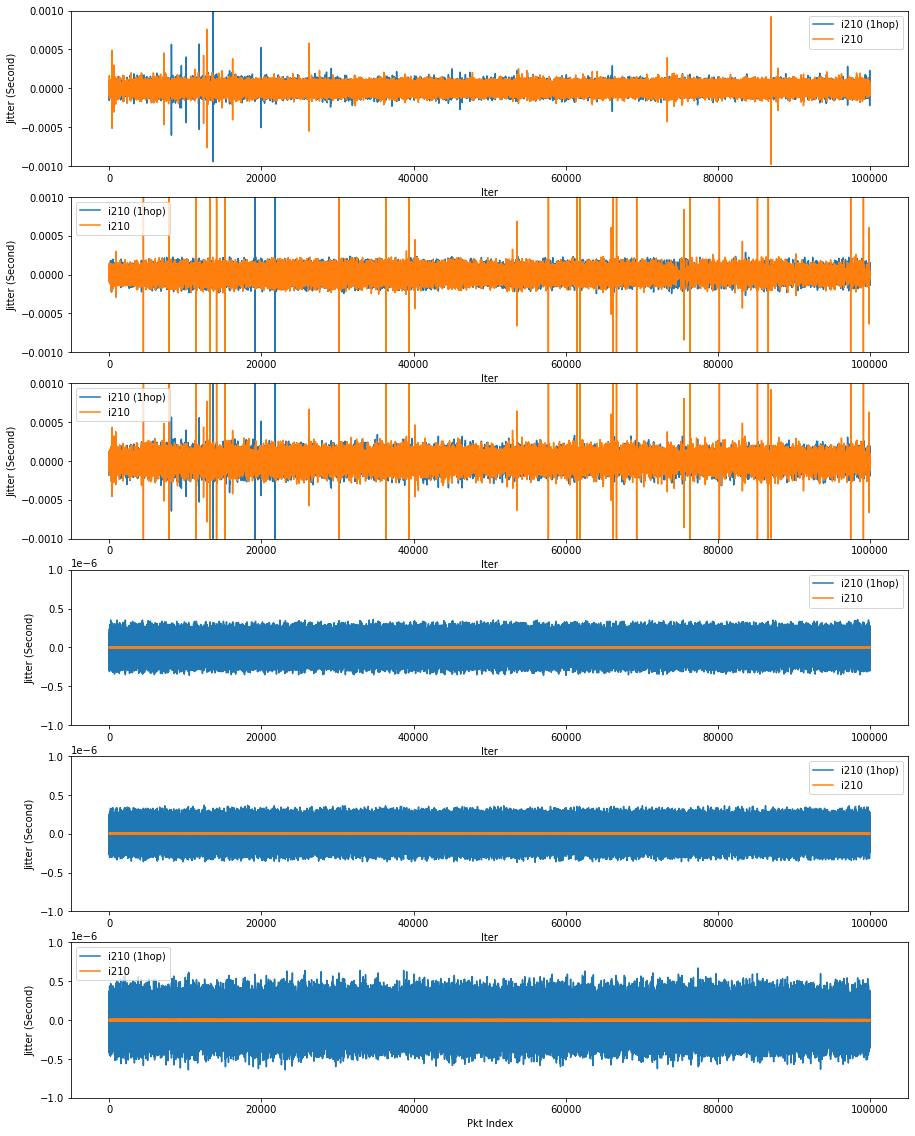

In [21]:
fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop[i].diff(), label='i210 (1hop)',ax=axes[n])
    a = sns.lineplot(x=data_i210['Iter'], y=data_i210[i].diff(), label='i210',ax=axes[n])
    if i[-4:] == 'SOFT':
        a.set(ylim=(-0.001, 0.001))
    else:
        a.set(ylim=(-0.000001, 0.000001))
    a.set_ylabel('Jitter (Second)')
    plt.xlabel("Pkt Index")
plt.savefig("06_compare_hop.png")

In [22]:
data_i210_2hopc = load("client_2hop.log", True).loc[:RECORDS]
data_i210_2hops = load("server_2hop.log", False).loc[:RECORDS]

data_i210_2hop = pd.merge(left=data_i210_2hopc, right=data_i210_2hops, on='Iter')

data_i210_2hop["GO-DELAY-HARD"] = data_i210_2hop['HW-RECV-S'] - data_i210_2hop['HW-SEND-C']
data_i210_2hop["GO-DELAY-SOFT"] = data_i210_2hop['SW-RECV-S'] - data_i210_2hop['SW-SEND-C']
data_i210_2hop["BACK-DELAY-HARD"] = data_i210_2hop['HW-RECV-C'] - data_i210_2hop['HW-SEND-S']
data_i210_2hop["BACK-DELAY-SOFT"] = data_i210_2hop['SW-RECV-C'] - data_i210_2hop['SW-SEND-S']
data_i210_2hop["RTT-SOFT"] = (data_i210_2hop['SW-RECV-C'] - data_i210_2hop['SW-SEND-C']) - (data_i210_2hop['SW-SEND-S'] - data_i210_2hop['SW-RECV-S'])
data_i210_2hop["RTT-HARD"] = (data_i210_2hop['HW-RECV-C'] - data_i210_2hop['HW-SEND-C']) - (data_i210_2hop['HW-SEND-S'] - data_i210_2hop['HW-RECV-S'])


SW-RECV    TIMESTAMP
SW-SEND    TIMESTAMP


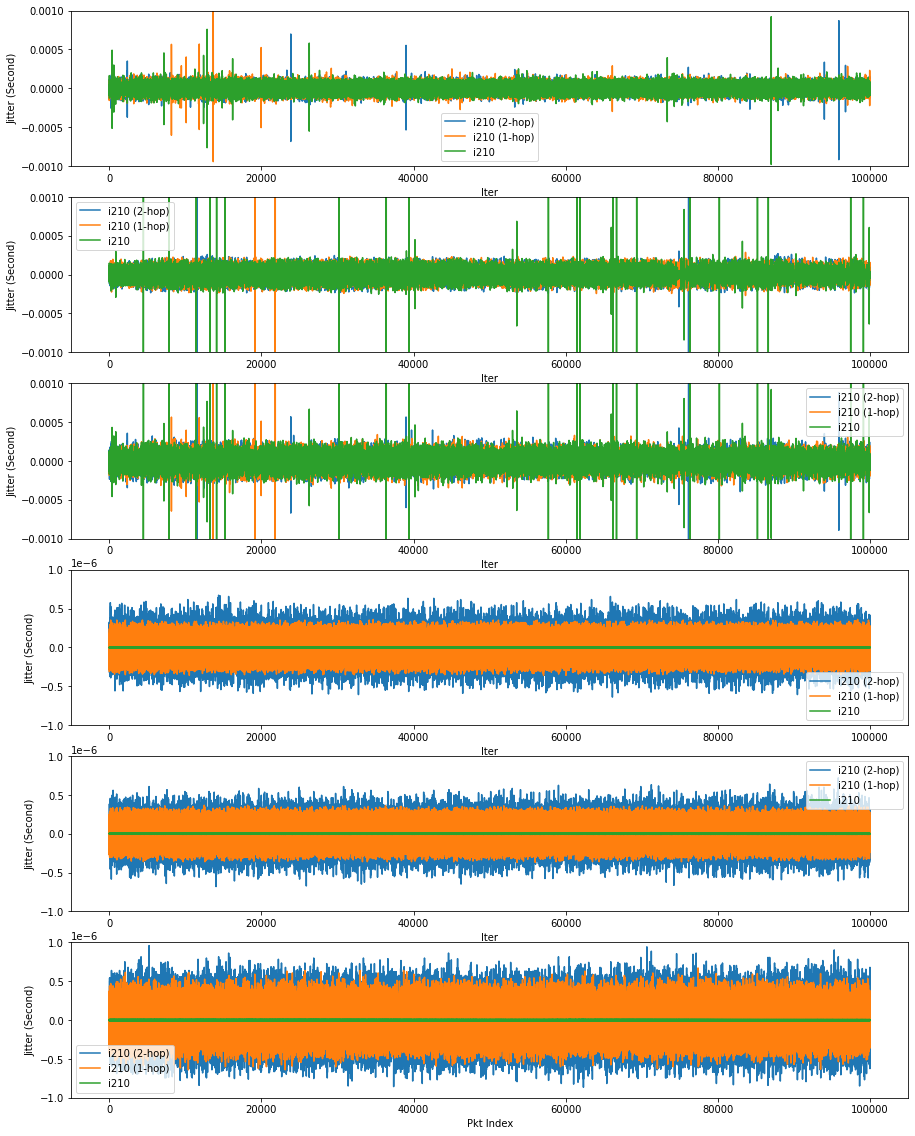

In [23]:
fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data_i210_2hop['Iter'], y=data_i210_2hop[i].diff(), label='i210 (2-hop)',ax=axes[n])
    a = sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop[i].diff(), label='i210 (1-hop)',ax=axes[n])
    a = sns.lineplot(x=data_i210['Iter'], y=data_i210[i].diff(), label='i210',ax=axes[n])
    if i[-4:] == 'SOFT':
        a.set(ylim=(-0.001, 0.001))
    else:
        a.set(ylim=(-0.000001, 0.000001))
    a.set_ylabel('Jitter (Second)')
    plt.xlabel("Pkt Index")
plt.savefig("06_compare_2hop.png")

In [24]:
data_i210_3hopc = load("client_3hop.log", True).loc[:RECORDS]
data_i210_3hops = load("server_3hop.log", False).loc[:RECORDS]

data_i210_3hop = pd.merge(left=data_i210_3hopc, right=data_i210_3hops, on='Iter')

data_i210_3hop["GO-DELAY-HARD"] = data_i210_3hop['HW-RECV-S'] - data_i210_3hop['HW-SEND-C']
data_i210_3hop["GO-DELAY-SOFT"] = data_i210_3hop['SW-RECV-S'] - data_i210_3hop['SW-SEND-C']
data_i210_3hop["BACK-DELAY-HARD"] = data_i210_3hop['HW-RECV-C'] - data_i210_3hop['HW-SEND-S']
data_i210_3hop["BACK-DELAY-SOFT"] = data_i210_3hop['SW-RECV-C'] - data_i210_3hop['SW-SEND-S']
data_i210_3hop["RTT-SOFT"] = (data_i210_3hop['SW-RECV-C'] - data_i210_3hop['SW-SEND-C']) - (data_i210_3hop['SW-SEND-S'] - data_i210_3hop['SW-RECV-S'])
data_i210_3hop["RTT-HARD"] = (data_i210_3hop['HW-RECV-C'] - data_i210_3hop['HW-SEND-C']) - (data_i210_3hop['HW-SEND-S'] - data_i210_3hop['HW-RECV-S'])


SW-SEND    TIMESTAM
SW-RECV    TIMESTAM


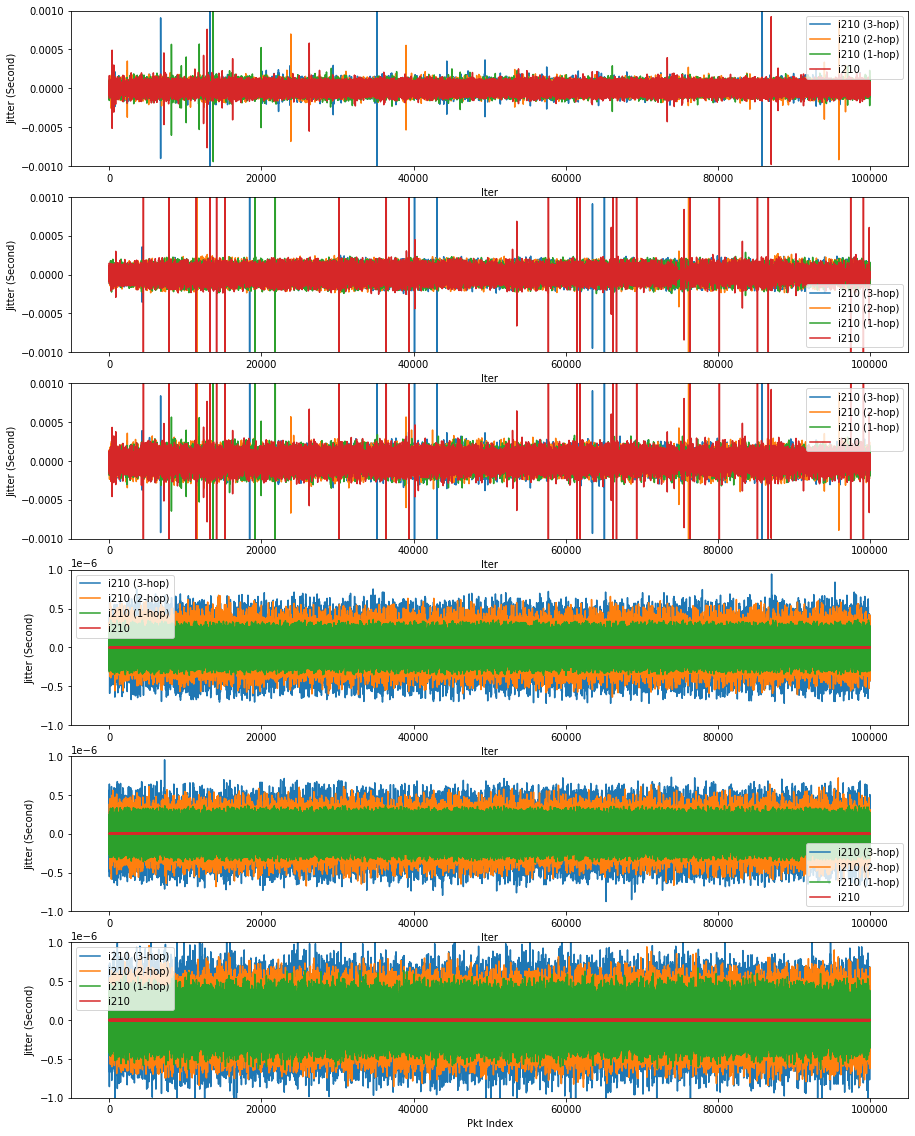

In [27]:
fig, axes = plt.subplots(6, 1, figsize=(15,20))
for n,i in enumerate(['GO-DELAY-SOFT', 'BACK-DELAY-SOFT', 'RTT-SOFT','GO-DELAY-HARD', 'BACK-DELAY-HARD', 'RTT-HARD']):
    a = sns.lineplot(x=data_i210_3hop['Iter'], y=data_i210_3hop[i].diff(), label='i210 (3-hop)',ax=axes[n])
    a = sns.lineplot(x=data_i210_2hop['Iter'], y=data_i210_2hop[i].diff(), label='i210 (2-hop)',ax=axes[n])
    a = sns.lineplot(x=data_i210_1hop['Iter'], y=data_i210_1hop[i].diff(), label='i210 (1-hop)',ax=axes[n])
    a = sns.lineplot(x=data_i210['Iter'], y=data_i210[i].diff(), label='i210',ax=axes[n])
    if i[-4:] == 'SOFT':
        a.set(ylim=(-0.001, 0.001))
    else:
        a.set(ylim=(-0.000001, 0.000001))
    a.set_ylabel('Jitter (Second)')
    plt.xlabel("Pkt Index")
plt.savefig("06_compare_3hop.png")